In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Official deaths daily']]
data.columns = ['ds', 'y']

In [4]:
data['floor'] = 0
data['cap'] = 50

# Modeling

### Model creation

In [5]:
model_args = {
    'changepoint_prior_scale': 0.95,
    'growth': 'logistic',
    'weekly_seasonality': 20,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [6]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = model.make_future_dataframe(periods = 1)
future['floor'] = 0
future['cap'] = 50

forecast = model.predict(future)

In [8]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
71,2020-06-16,16.0,16.657709,8.484343,24.328466
72,2020-06-17,14.0,17.439129,10.031929,25.071514
73,2020-06-18,30.0,14.809209,6.697145,22.902569
74,2020-06-19,18.0,13.843298,5.923256,21.760501
75,2020-06-20,12.0,11.989283,4.170706,19.931536
76,2020-06-21,10.0,8.135165,-0.149398,15.931013
77,2020-06-22,3.0,10.024446,2.558835,17.951743
78,2020-06-23,16.0,16.913201,8.796458,25.241418
79,2020-06-24,21.0,17.694766,10.095086,25.303741
80,2020-06-25,NaN,15.064991,7.053869,22.453111


### Model explanation

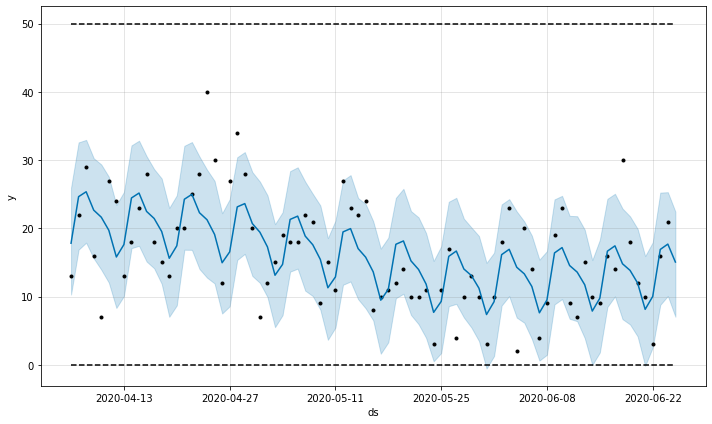

In [9]:
fig = model.plot(forecast)

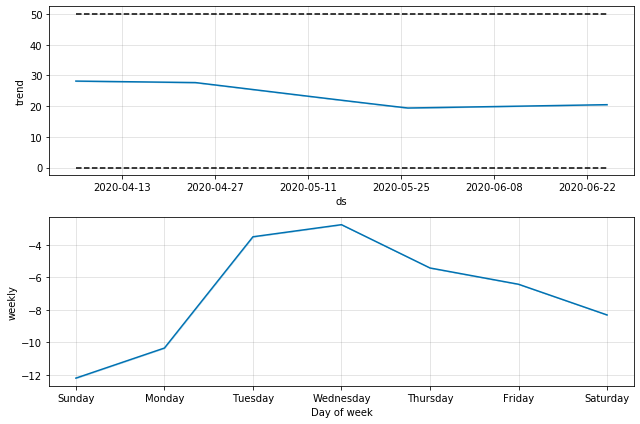

In [10]:
fig = model.plot_components(forecast)

### Model performance

In [11]:
results = cross_validation(model, initial = '65 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-06-10 00:00:00 and 2020-06-23 00:00:00


In [12]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,10.195622,2.125187,17.934512,9.0,2020-06-10
1,2020-06-12,10.279220,2.366290,17.790613,7.0,2020-06-11
2,2020-06-13,7.395941,-0.814947,15.287305,15.0,2020-06-12
3,2020-06-14,3.673576,-4.054189,11.418978,10.0,2020-06-13
4,2020-06-15,8.774073,1.332217,16.489444,9.0,2020-06-14
5,2020-06-16,14.962769,7.788169,22.416280,16.0,2020-06-15
6,2020-06-17,15.651056,8.058684,22.558760,14.0,2020-06-16
7,2020-06-18,11.226542,3.910296,19.270590,30.0,2020-06-17
8,2020-06-19,13.639884,6.100659,22.040570,18.0,2020-06-18
9,2020-06-20,12.517993,4.417360,20.106267,12.0,2020-06-19


In [13]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,41.38549,6.433156,4.285005,0.438807,0.161017,0.857143


### Tomorrow prediction

In [14]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

15